<a href="https://colab.research.google.com/github/Panchol211/Week6_CORE_IP/blob/main/Week6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA Games Prediction

# Define Analysis Question

Build a regression model that predicts the home team's score for each
match

Build a classifier that predicts whether the home team will win, lose or draw

# Metrics for Success

Performance of the regression models will be determined using the RMSE score.

Classifier accuracy will be determined using the confusion matrix



# Understanding 

Mchezopesa Ltd management is interested in a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. Football matches and FIFA rankings data has been provided for analysis. As data scientist i have to help them achieve thier results by providing them with best model that accurately predict results

# Experimental Design Approach

Data Exploration

Feature Engineering

Data Analysis

Modelling

Results  

Challenging Solution

Conclusions

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
import requests
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Reading the Data

In [3]:
## Loading data setting to into pandas for analysis 
fifa_ranking = pd.read_csv("fifa_ranking.csv")
results = pd.read_csv("results.csv")

Checking the Data

In [4]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# Determining the no. of records in our dataset
fifa_ranking.shape

(57793, 16)

In [7]:
#checking the layout of the results dataset 
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [8]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
results.shape

(40839, 9)

In [10]:
# Previewing some information of the fifa ranking dataset
#
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [11]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [12]:
# Checking whether each column has an appropriate datatype
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

We can see that the rest of the variables are either int or float, only 4 variables are objects

In [13]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Just only the home score and away school are int the rest are objects, neutral is boolean

In [14]:
# Previewing some statistical summaries of the fifa ranking dataset
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [15]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


The home scores have a higher means and standard deviation compare to away scores.

In [16]:
# Checking for missing values of the fifa ranking dataset
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [17]:
# Checking for duplicates
fifa_ranking.duplicated().any()

True

In [18]:
# Removing duplicates
fifa_ranking.drop_duplicates(keep='first', inplace = True)

In [19]:
# Checking whether the duplicates have been removed
fifa_ranking.duplicated().any()

False

In [20]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [21]:
# Checking for duplicates
results.duplicated().any()

False

In [22]:
# Renaming the rank_date column
fifa_ranking.rank_date = fifa_ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [23]:
# Making the date columns uniform
results.date = results.date.apply(lambda x: x.replace('/', '-'))
fifa_ranking.date = fifa_ranking.date.apply(lambda x: x.replace('/', '-'))

In [24]:
# Changing the date columns to datetime objects
fifa_ranking.date = pd.to_datetime(fifa_ranking.date)
results.date = pd.to_datetime(results.date)

# Creating a year and month column from the datetime object
fifa_ranking['year'] = fifa_ranking.date.dt.year
results['year'] = results.date.dt.year

fifa_ranking['month'] = fifa_ranking.date.dt.month
results['month'] = fifa_ranking.date.dt.month

In [25]:
# Checking the unique years in the ranking dataset
fifa_ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [26]:
# Checking the unique years in the results dataset
results.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [27]:
# Merging the results dataframe to the ranking dataframe
# The dataframes have been merged on both year and month
frr = pd.merge(results, fifa_ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

In [28]:
#previewing the merged dataset 
frr.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [29]:
#the ranking details of the home team only
#
home_team_only = frr[frr.home_team == frr.country_full]
#previewing the first five rows of the home_combined dataframe
#
home_team_only.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [30]:
# Getting the columns to be renamed
#
home_team_only.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [31]:
# Renaming the selected home_team columns using a for loop
for x, y in zip(home_team_only.columns[11:-2], home_team_only.columns[11:-2]):
  home_team_only.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
home_team_only.columns[11:-2]

Index(['rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home'],
      dtype='object')

In [32]:
#Selecting the ranking details of the away team only
away_team_only = frr[frr.away_team == frr.country_full]
#previewing the first five rows of the away_combined dataframe
away_team_only.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [33]:
# Getting the columns to be renamed in the away_combined dataframe
#
away_team_only.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [34]:
# Renaming the selected away_team columns using a for loop
for x, y in zip(away_team_only.columns[11:-2], away_team_only.columns[11:-2]):
  away_team_only.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
away_team_only.columns[11:-2]

Index(['rank_away', 'country_full_away', 'country_abrv_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away'],
      dtype='object')

In [35]:
# Selecting only the relevant columns in the away_team dataframe
# Creating a list of relevant columns
needed_cols = list(away_team_only.columns[9:-2])
needed_cols.extend(['home_team', 'away_team'])

away_team_only = away_team_only[needed_cols]

# Previewing the first two columns of the away_team dataset
away_team_only.head(5)

,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team
18224,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barbados,Grenada
18286,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghana,Egypt
18532,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mali,Burkina Faso
18648,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mauritania,Mali
18774,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thailand,Nigeria


In [36]:
# Merging the home_team dataframe to the away_team dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns
#
final_df = pd.merge(home_team_only, away_team_only, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Previewing the merged dataframe
final_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,date_y,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Removing irrelevant columns from the final dataframe
# Creating a list of columns to be dropped
drop_cols = ['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away']
final_df.drop(drop_cols, axis = 1, inplace = True)

In [38]:
# Checking for missing values
final_df.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1811
total_points_away               1811
previous_points_away            1811
r

In [39]:
# Dropping missing values
final_df.dropna(inplace=True)

In [40]:
# Creating a copy of the final_df for later usage
df = final_df.copy()

In [41]:
# Previewing the first five rows of the engineered dataframe
#
df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


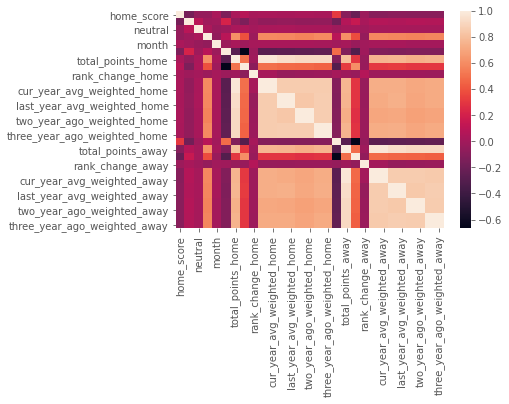

In [42]:
sns.heatmap(df.corr())
plt.show()

In [43]:
# Checking the datatypes of the df dataframe
#
df.dtypes

date_x                          datetime64[ns]
home_team                               object
away_team                               object
home_score                               int64
away_score                               int64
tournament                              object
city                                    object
country                                 object
neutral                                   bool
year                                     int64
month                                    int64
rank_home                              float64
total_points_home                      float64
previous_points_home                   float64
rank_change_home                       float64
cur_year_avg_home                      float64
cur_year_avg_weighted_home             float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ag

In [44]:
# Changing the df dataframe datatypes
cat_cols = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

# Using a for loop to change the datatypes to categorical
for col in cat_cols:
  df[col] = df[col].astype('category')

In [45]:
# Creating a new column showing the final result
# The column has been created by subtracting the away score from the home score
# zero goals means a draw
# Positive goals means the home team won
# Negative goals means the away team won, which means that the home team lost.
#
df['score'] = df.home_score - df.away_score

In [46]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
df['result'] = df.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
#
df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored
#
df['total_goals'] = df.home_score + df.away_score

# Previewing the last five rows of the dataframe together with the result column
#
df.tail()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,total_goals
20537,2018-10-16,Japan,Uruguay,4,3,Friendly,Saitama,Japan,False,2018,6,61.0,520.75,528.0,-1.0,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,14.0,1018.41,976.0,3.0,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,Win,7
20538,2018-10-16,Laos,Mongolia,1,4,Friendly,Vientiane,Laos,False,2018,6,178.0,81.58,80.0,1.0,21.25,21.25,65.52,32.76,63.57,19.07,42.50,8.50,AFC,186.0,51.00,51.0,2.0,8.50,8.50,34.00,17.00,0.00,0.00,127.50,25.50,Lose,5
20540,2018-10-16,Mexico,Chile,0,1,Friendly,Queretaro,Mexico,False,2018,6,15.0,989.44,1008.0,0.0,470.55,470.55,506.78,253.39,579.97,173.99,457.54,91.51,CONCACAF,9.0,1134.66,1146.0,0.0,403.99,403.99,831.33,415.67,724.98,217.49,487.56,97.51,Lose,1
20541,2018-10-16,Oman,Ecuador,0,0,Friendly,Doha,Qatar,True,2018,6,84.0,391.06,383.0,3.0,259.44,259.44,114.64,57.32,192.68,57.80,82.45,16.49,AFC,60.0,523.85,506.0,3.0,67.14,67.14,387.50,193.75,630.02,189.01,369.77,73.95,Draw,0
20542,2018-10-16,Sweden,Slovakia,1,1,Friendly,Stockholm,Sweden,False,2018,6,24.0,879.90,889.0,-1.0,478.44,478.44,431.99,215.99,370.10,111.03,372.19,74.44,UEFA,28.0,804.36,786.0,1.0,332.12,332.12,454.01,227.01,325.92,97.77,737.30,147.46,Draw,2


**Checking for outliers**

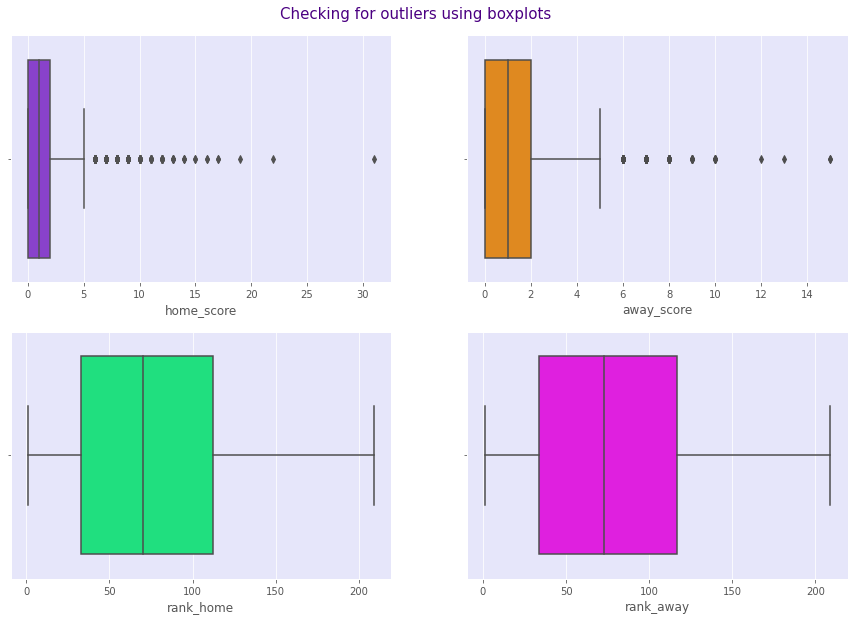

In [47]:
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'rank_home', 'rank_away']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

There are outliers in both the home and away scores but they are important in the data analysis so i will keep them 

**Scatterplots**

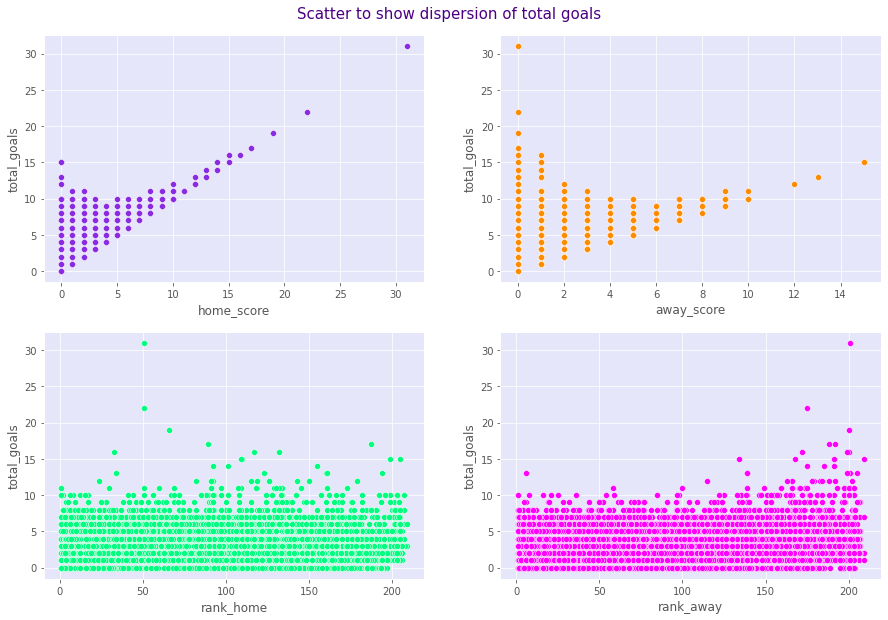

In [48]:
# Plotting scatter plots to show dispersion of total goals
# Setting the figure size to 15 by 10
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Scatter to show dispersion of total goals', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.scatterplot(df[column], df.total_goals, ax = ax, color = color)
  ax.set_facecolor('lavender') 

**Teams with highest number of goals in all of the tournaments**

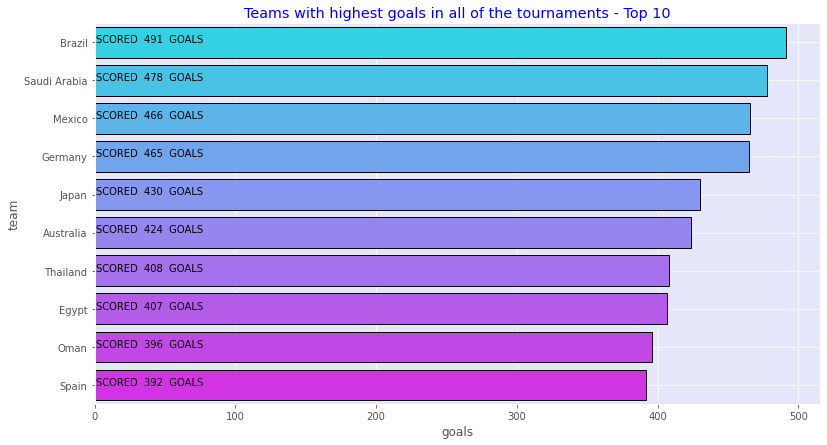

In [49]:
# Creating a dataframe of home teams with their total goals scored
#
total_goals_home = df.groupby('home_team')['home_score'].sum().reset_index()
total_goals_home.columns = ['team', 'goals'] # Giving the dataframe column names

# Creating a dataframe of away teams with their total goals scored
#
total_goals_away = df.groupby('away_team')['away_score'].sum().reset_index()
total_goals_away.columns = ['team', 'goals'] # Giving the dataframe column names

# Concating the two dataframes together and then grouping dataframes by team to find total goals scored
#
total_goals = pd.concat([total_goals_home, total_goals_away])
total_golas = total_goals.sort_values(by = 'goals', ascending = False, inplace = True) # sorting the teams by goals scored
total_goals.goals = total_goals.goals.astype(int) # Changing the datatype of the goals column to integer

plt.figure(figsize=(13,7))  # Creating a figure of length 13 and height 7
ax= sns.barplot("goals","team",data=total_goals[:10],palette="cool",linewidth=1, edgecolor="k"*20)

ax.set_facecolor('lavender') # Setting the background color to lavender

for i,j in enumerate("SCORED  " + total_goals["goals"][:10].astype(str) + "  GOALS"): # Annotating the barplot
    ax.text(.7,i,j,fontsize = 10, color="k")

plt.title("Teams with highest goals in all of the tournaments - Top 10",color='b')
plt.grid(True)
plt.show()

In [50]:
#creating dataset that can be used to for answering the resrach questions 
#
dataset = df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'rank_home', 'rank_away']]

# Previewing the first five rows of the dataset
#
dataset.head()

,home_team,away_team,home_score,away_score,tournament,rank_home,rank_away
0,Barbados,Grenada,0,0,Friendly,99.0,131.0
1,Barbados,Grenada,0,0,Friendly,99.0,131.0
2,Ghana,Egypt,2,1,Friendly,29.0,24.0
3,Mali,Burkina Faso,1,1,Friendly,48.0,101.0
4,Mauritania,Mali,1,3,Friendly,147.0,48.0


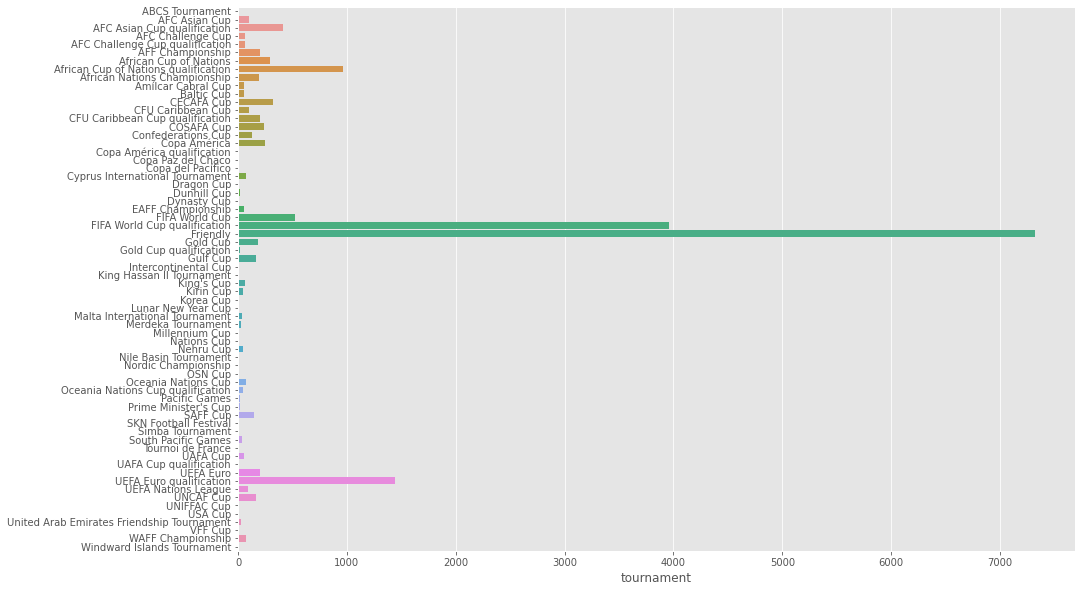

In [54]:
# Investigate types of tournaments
plt.figure(figsize=(15,10))
sns.barplot(dataset.tournament.value_counts(),dataset.tournament.value_counts().index)
plt.show()

Friendly are the most frequent games followed by world cup qualifies.

**Checking for multicollinearity**

In [55]:
# Displaying the correlations between the variables
#
corrs = dataset.drop('home_score', axis = 1).corr()
corrs

,away_score,rank_home,rank_away
away_score,1.000000,0.213023,-0.184574
rank_home,0.213023,1.000000,0.481889
rank_away,-0.184574,0.481889,1.000000


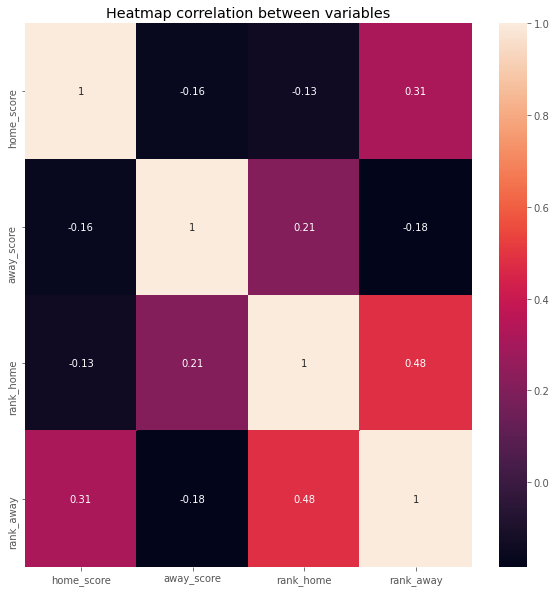

In [56]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), annot = True) 
plt.title('Heatmap correlation between variables')
plt.show()

# Building Models 

**Approach 1: Creating the polynomial model**

In [57]:
# Creating X and y variables
#
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6]]
y = dataset.home_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3278064476746914


The model has a lower RMSE therefore the model performance can fairly predict good results 

**Hyperparameter tuning to find the optimal parameters for the model**

In [58]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -1.8751779365911763 and the best parameters are {'fit_intercept': True, 'normalize': False}


**Performing cross validation to check for overfitting or underfitting**

In [59]:
# Performing cross validation of ten folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 1.875
Standard deviation of the cross validation scores is 0.241


The model is average it has a fairly deviation 0f 0.241

**Approach 2: Using Logistic Regression**

In [60]:
# Selecting the relevant features for the logistic regression model
#
data = df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,Win
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,Draw
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,Lose


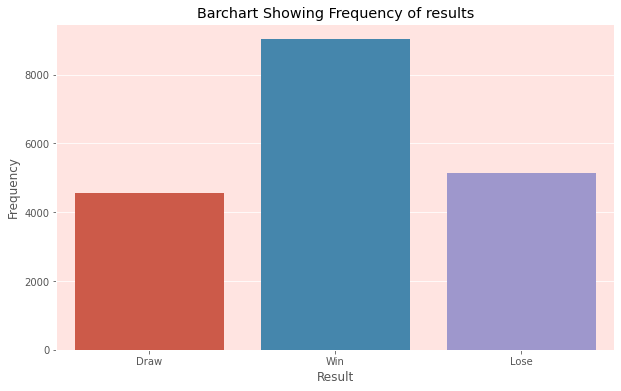

In [61]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 6))
ax = sns.countplot(data.result)
ax.set_facecolor('mistyrose')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()

LogisticRegression model

In [62]:
# Spliting the data into features and the target variable
#
X = data.drop('result', axis = 1)
y = data.result

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'The f1 score of the model is {f1_score(y_test, y_pred, average = "macro")}')
confusion_matrix(y_test, y_pred)

The accuracy of the model is 1.0
The f1 score of the model is 1.0


array([[1123,    0,    0],
       [   0, 1310,    0],
       [   0,    0, 2250]])

In [63]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00      1123
        Lose       1.00      1.00      1.00      1310
         Win       1.00      1.00      1.00      2250

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683



The model has a 100% accuracy, correctly classifying each match, in other word there is overfiting and more analysis should be done on advance models

**Hyperparameter tuning**

In [64]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Creating a dictioanry of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


In [68]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(10)

,Actual,Predicted
7886,Draw,Draw
347,Win,Win
7416,Win,Win
8254,Lose,Lose
5792,Lose,Lose
16373,Lose,Lose
9925,Win,Win
20040,Lose,Lose
16506,Lose,Lose
12862,Draw,Draw


The model can predict accurately after the tunning 




# Results
The models perfromed relatively well on the given data, the logistic regression performed with 100% accuracy.





# Challenging the Solution


a) Did we have the right question?

Yes.


b) Did we have the right data?


Yes. The data available for analysis was suitable for analysis, however a large percentage of match data was lost due to the unavailability of FIFA ranking data for the years in which the matches were played.



c) What can be done to improve the solution?


Tuning of the polynomial model.
More sophisticated categorization of tournaments instead on just friendly! because some of the freindly are not recoginize by FIFA and probably they were included in the dataset

# In conclusion 

The two models implemented above performed fairly and logistic regression is the optimal model 

From the dataset it can be seen that there is no ranking before 1993, this data is important and it will be great sense if it is icluded in further analysis of this predication.



